# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import prophet

# 2. Load Data
Aturan prophet : nama kedua kolom harus ds (dalam datetime) dan y

In [4]:
df = pd.read_csv('/content/daily_min_temp.csv')
df.columns = ['ds','y']                # rename nama kolom
df['ds']   = pd.to_datetime(df['ds'])  # ubah tipe data tanggal
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


<Axes: >

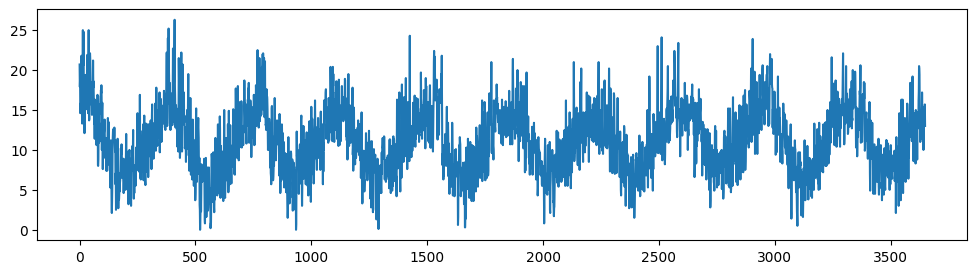

In [7]:
series = df.y
series.plot(figsize=(12,3))

# 3. Data Splitting

In [20]:
n = 365
X_train, X_test = df[:-n],df[-n:]

In [21]:
100*len(X_train)/len(df)

90.0

In [22]:
100*len(X_test)/len(df)

10.0

# 4. Mini EDA - Decompostion

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

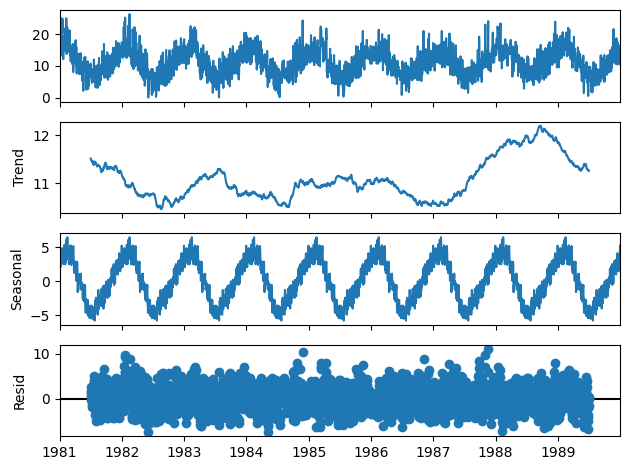

In [24]:
decomposition = seasonal_decompose(X_train.set_index('ds'),model='additive',period=365)
fig = decomposition.plot()
plt.show()

Insights :
1. trend data tidak stasioner
2. seasonality additive

# 5. Modeling

In [31]:
from prophet import Prophet

In [32]:
model = Prophet()
model.fit(X_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppidtnw7v/5te00kea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppidtnw7v/5fot6jo_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89721', 'data', 'file=/tmp/tmppidtnw7v/5te00kea.json', 'init=/tmp/tmppidtnw7v/5fot6jo_.json', 'output', 'file=/tmp/tmppidtnw7v/prophet_modelfv7wiyp4/prophet_model-20240522133445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
train_pred = model.predict(X_train[['ds']])['yhat'].to_list()
test_pred  = model.predict(X_test[['ds']])['yhat'].to_list()

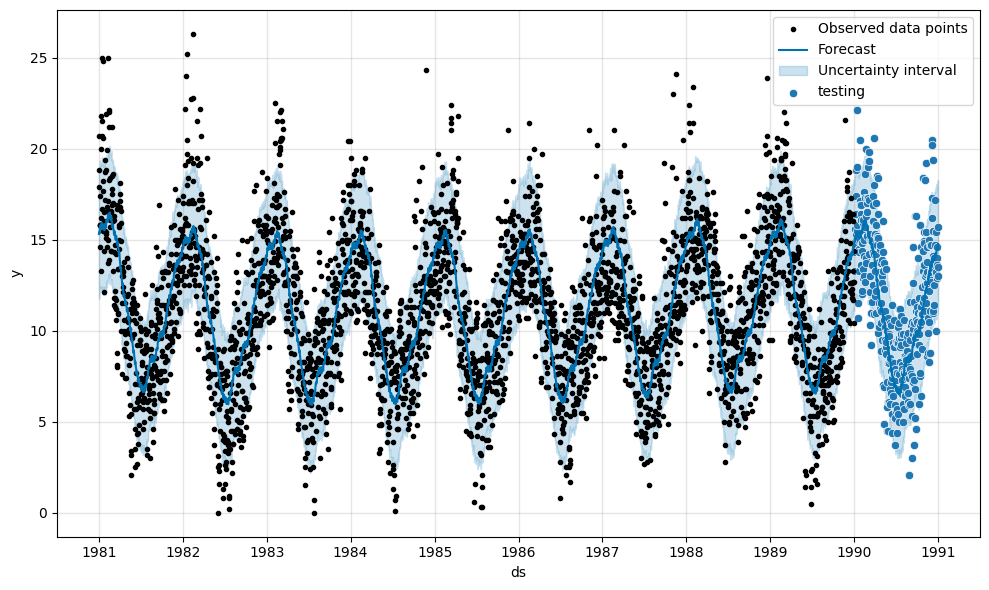

In [39]:
import seaborn as sns
model.plot(model.predict(df[['ds']]))
sns.scatterplot(data=X_test,x='ds',y='y',label='testing')
plt.show()

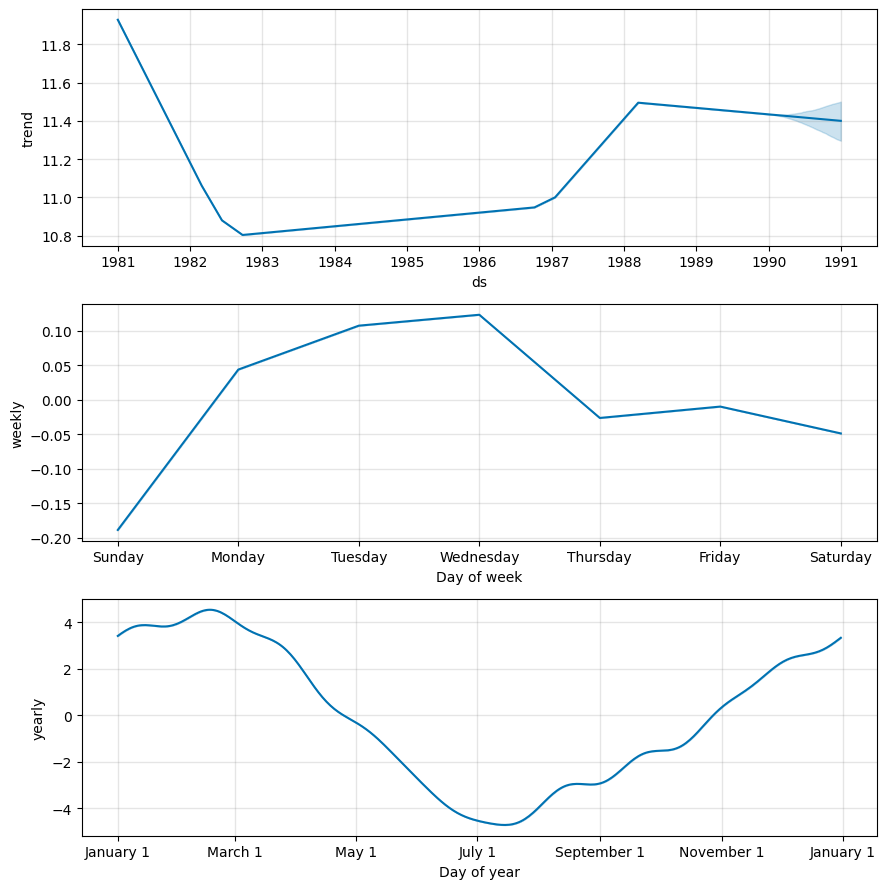

In [41]:
model.plot_components(model.predict(df[['ds']]));